# Pymaceuticals Inc.
---

### Analysis

Based on the data and figures in this assignment, we can make the following conclusions:

* Ramicane has the smallest summary statistics (mean $\approx$ 40.2, median $\approx$ 40.7, variance $\approx$ 23.5, standard deviation $\approx$ 4.8, and sample error of the mean $\approx$ 0.32) of the original set of mice.
    * The same is true of Ramicane at the endpoints as well, in that it has the smallest median of all 4 drugs sampled at the end.
* Propriva has the least amount of timepoints in the entire sample; Capomulin has the most amount of timepoints.
* The sex of the mice was basically a 50-50 split.
* For mouse L509, the affect of the treatment (Capomulin) was that the tumor volume decreased by the end.
* For mice given the Capomulin drug regimen, there is a positive correlation between the avegage mass and the average tumor volume over time.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete = study_results.merge(mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_complete["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_complete.loc[mouse_complete[["Mouse ID", "Timepoint"]].duplicated(),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates = mouse_complete.loc[mouse_complete["Mouse ID"].isin(duplicates), :]
mouse_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_complete.drop(mouse_duplicates.index)
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_clean_per_drug = mouse_clean.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = mouse_clean_per_drug["Tumor Volume (mm3)"].mean()
tumor_volume_median = mouse_clean_per_drug["Tumor Volume (mm3)"].median()
tumor_volume_var = mouse_clean_per_drug["Tumor Volume (mm3)"].var()
tumor_volume_stddev = mouse_clean_per_drug["Tumor Volume (mm3)"].std()
tumor_volume_stderr = mouse_clean_per_drug["Tumor Volume (mm3)"].sem()

tumor_volume_stats = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                                   "Median Tumor Volume": tumor_volume_median,
                                   "Tumor Volume Variance": tumor_volume_var,
                                   "Tumor Volume Std. Dev.": tumor_volume_stddev,
                                   "Tumor Volume Std. Err.": tumor_volume_stderr
                                  })

tumor_volume_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_stats_per_drug = mouse_clean_per_drug.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
mouse_stats_per_drug.style.set_properties(**{"text-align": "right"})

## Bar and Pie Charts

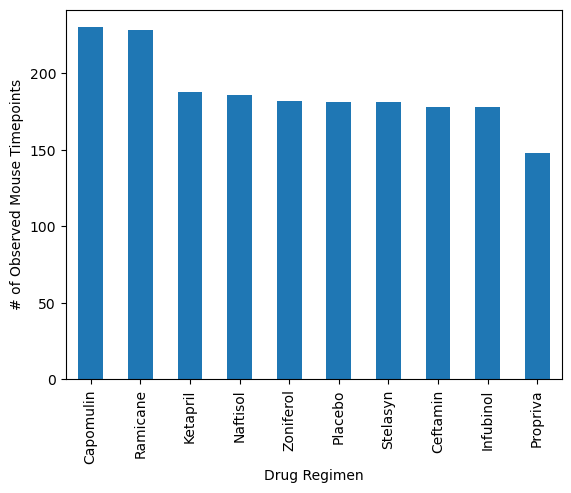

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_clean_per_drug["Timepoint"].count()\
            .sort_values(ascending = False).plot(kind = "bar",
                                                 ylabel = "# of Observed Mouse Timepoints"
                                                )
plt.show()

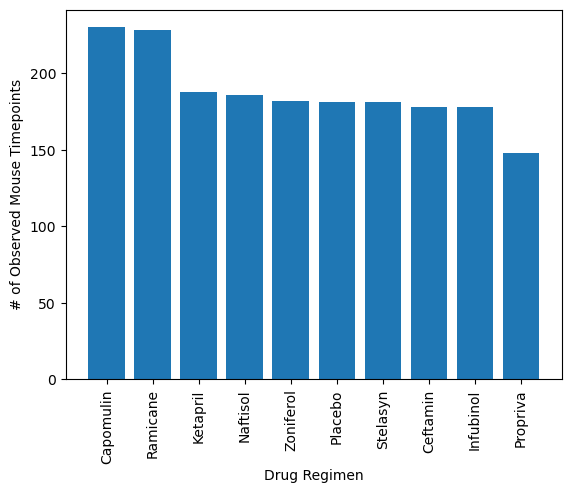

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_grouped = mouse_clean_per_drug["Timepoint"].count().sort_values(ascending = False)
plt.bar(x = mouse_grouped.index, height = mouse_grouped)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

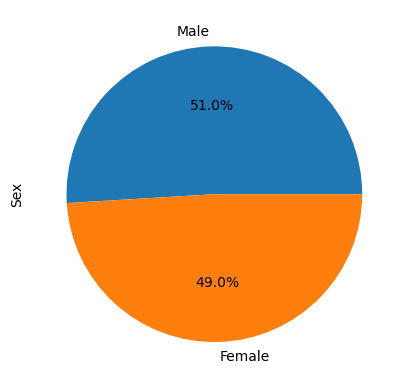

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_clean.groupby("Sex")["Sex"].count().sort_values(ascending = False)\
                    .plot(kind = "pie",
                          autopct = "%1.1f%%"
                         )
plt.show()

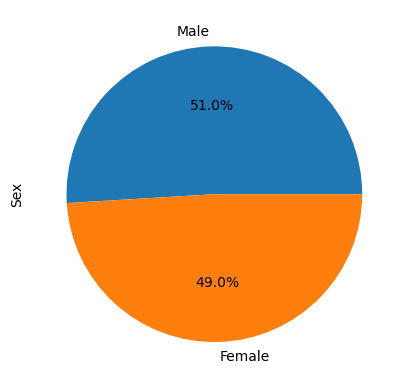

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = mouse_clean.groupby("Sex")["Sex"].count().sort_values(ascending = False)

plt.pie(mouse_sex, labels = mouse_sex.index,
       autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_clean_subset = mouse_clean[mouse_clean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint_max = mouse_clean_subset.groupby("Mouse ID").max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_timepoint_max_merge = mouse_timepoint_max.merge(mouse_clean, how = "inner", on = ["Mouse ID", "Timepoint"])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# I opted to use an empty dictionary instead of a list as so I can create a 
# DataFrame from the treatment name and it's data, and use that to create the plot.
# I actually went back and tried to create the DataFrame for the boxplot with the
# empty list, and I ended up needing to install numpy for this to use the transpose,
# which I think is silly for this.
tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    treatment_volume = mouse_timepoint_max_merge.loc[
        mouse_timepoint_max_merge["Drug Regimen"] == treatment,
        "Tumor Volume (mm3)"
    ]
    tumor_vol[treatment] = treatment_volume
    
    # Determine outliers using upper and lower bounds
    q25, q75 = treatment_volume.quantile([0.25,0.75])
    iqr = q75 - q25
    outliers = []    
    for volume in treatment_volume:
        if (volume < q25 - 1.5 * iqr) | (volume > q75 + 1.5 * iqr):
            outliers.append(volume)
    series = treatment_volume[
        treatment_volume.isin(outliers)
    ]
    print(f"{treatment}'s IQR is {iqr} and its potential outliers: {series}")

tumor_vol_df = pd.DataFrame(tumor_vol)

Capomulin's IQR is 7.781863460000004 and its potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR is 9.098536719999998 and its potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's IQR is 11.477135160000003 and its potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's IQR is 15.577752179999997 and its potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


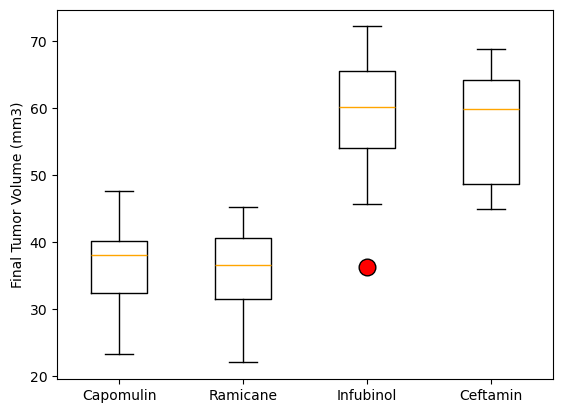

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_df.plot(kind = "box",
                  ylabel = "Final Tumor Volume (mm3)",
                  color = "black",
                  medianprops = dict(color = "orange"),
                  flierprops = {"markersize": 12, "markerfacecolor": "red"}
                 )

plt.show()

## Line and Scatter Plots

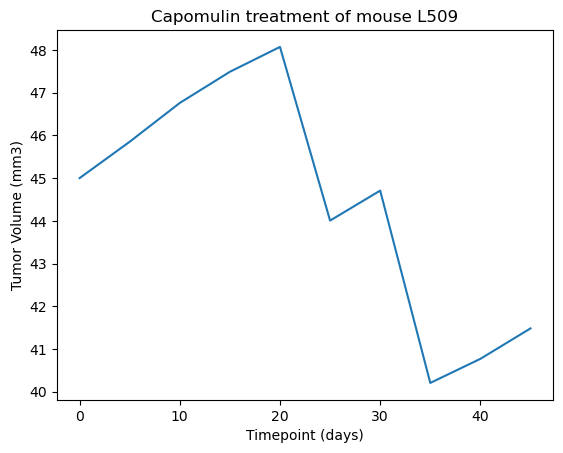

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_l509 = mouse_clean.loc[
    (mouse_clean["Drug Regimen"] == "Capomulin") &
    (mouse_clean["Mouse ID"] == "l509")
    ,:
]

capomulin_mouse_l509.plot(kind = "line", 
                          x = "Timepoint",
                          y = "Tumor Volume (mm3)",
                          title = "Capomulin treatment of mouse L509",
                          xlabel = "Timepoint (days)",
                          ylabel = "Tumor Volume (mm3)",
                          legend = False
                         )
plt.show()

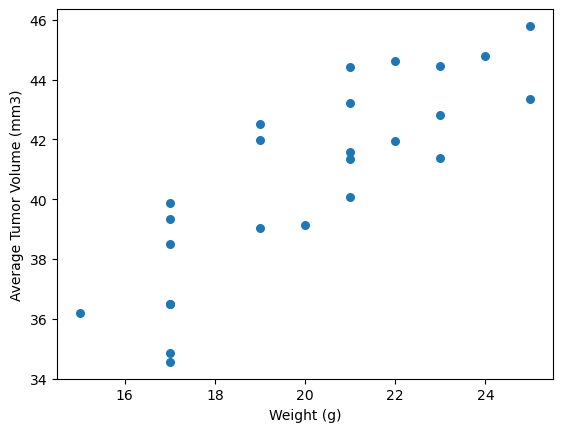

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = mouse_clean.loc[
    mouse_clean["Drug Regimen"] == "Capomulin"
    ,:
]

capomulin_avg_tumor_v_weight = capomulin_mice.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

capomulin_avg_tumor_v_weight.plot(kind = "scatter",
                                  x = "Weight (g)",
                                  y = "Tumor Volume (mm3)",
                                  ylabel = "Average Tumor Volume (mm3)",
                                  s=30
                                 )
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


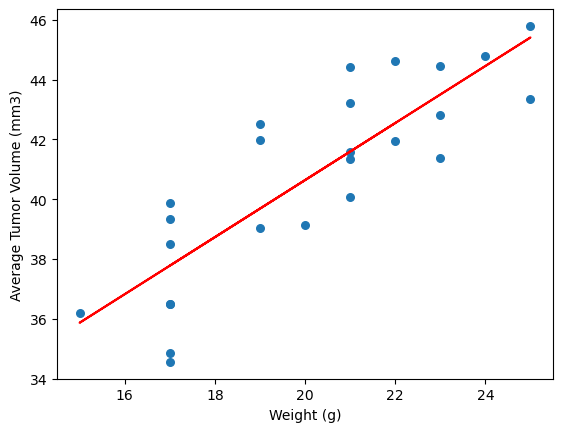

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r, p, se = st.linregress(capomulin_avg_tumor_v_weight["Weight (g)"],
                                           capomulin_avg_tumor_v_weight["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and the average tumor volume is {round(r,2)}")
capomulin_avg_tumor_v_weight.plot(kind = "scatter",
                                  x = "Weight (g)",
                                  y = "Tumor Volume (mm3)",
                                  ylabel = "Average Tumor Volume (mm3)",
                                  s=30
                                 )

x_values = capomulin_mice["Weight (g)"]
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, 'r')
plt.show()